In [1]:
#loading need libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn import preprocessing
%matplotlib inline

In [2]:
# load data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# EDA on Numerical Features
 Removing non-linear and co-linear features

In [3]:
corrmat=train.corr()
# fig,ax=plt.subplots(figsize=(12,12))
# sns.heatmap(corrmat,vmax=.8, square=True,ax=ax,annot=True, fmt='.2f', annot_kws={'size': 6})

In [4]:
n=15
top15_cols=corrmat.nlargest(n,'SalePrice')['SalePrice'].index

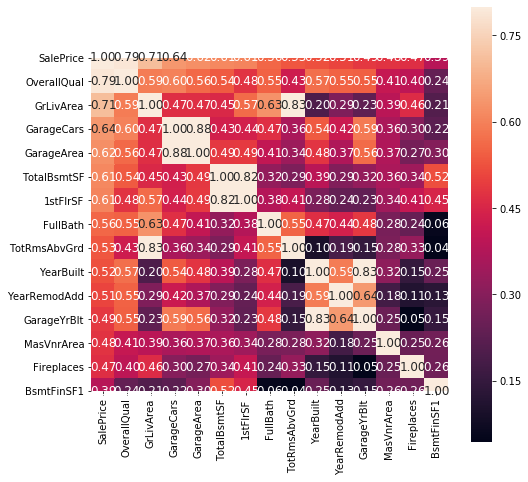

In [5]:
corrmat_top15=train[top15_cols].corr()
fig1,ax1=plt.subplots(figsize=(8,8))
sns.heatmap(corrmat_top15,vmax=.8, square=True,ax=ax1,annot=True, fmt='.2f', annot_kws={'size': 12})

# Co-linearity:

We will choose only one feature from each co-linear pair.

GarageCars and GarageArea
TotalBsmtSF and 1stFirSF
TotRmsAbvGrd and GrLIveArea
YearBuilt and GarageYrBlt
I choose GarageArea,TotalBsmtSF,GrLIveArea.I have made this decision by plotting below scatter plots.

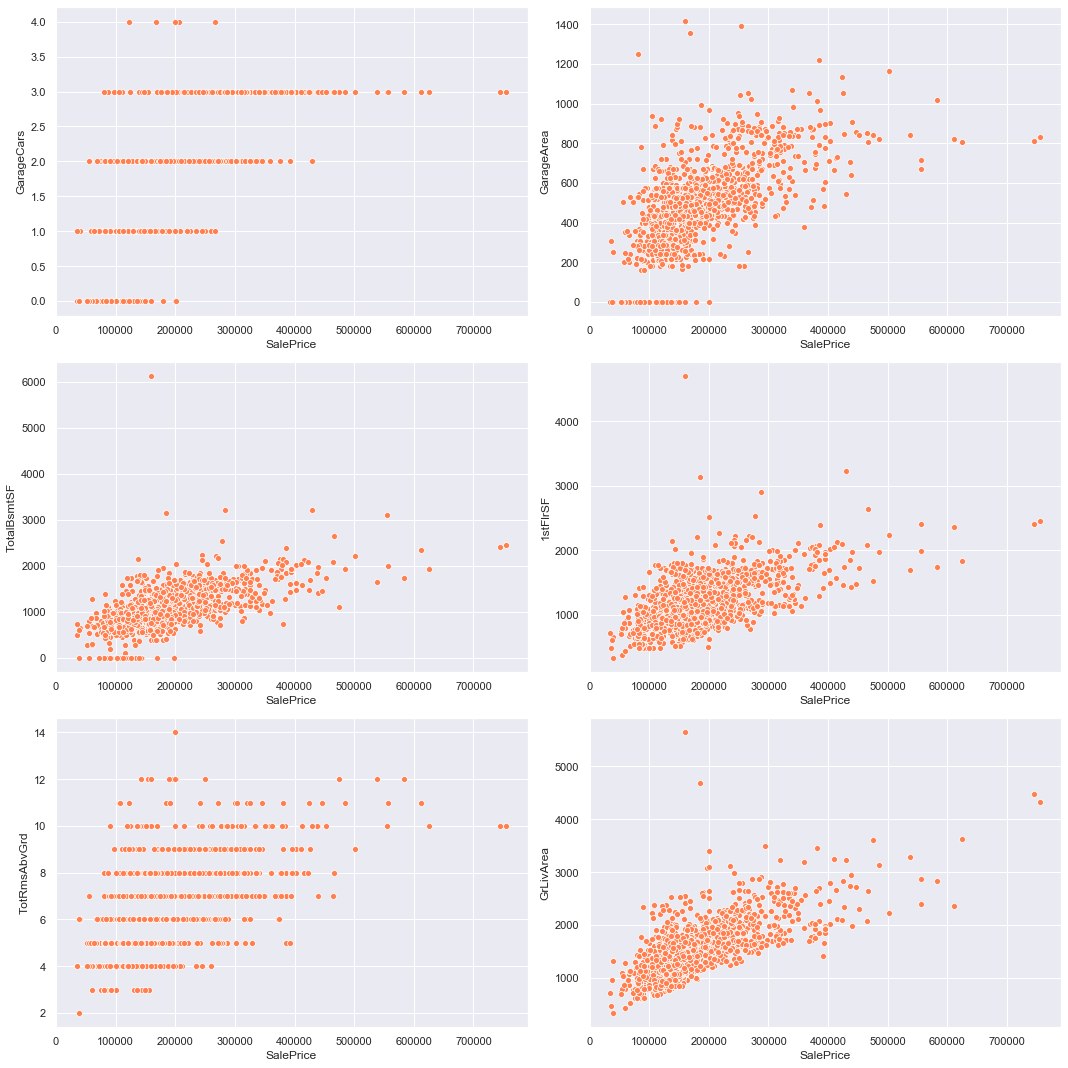

In [6]:
sns.set(style="darkgrid")

fig,ax=plt.subplots(3,2,figsize=(15,15))
sns.scatterplot(train['SalePrice'],train['GarageCars'],ax=ax[0][0],color='coral')
sns.scatterplot(train['SalePrice'],train['GarageArea'],ax=ax[0][1],color='coral')
sns.scatterplot(train['SalePrice'],train['TotalBsmtSF'],ax=ax[1][0],color='coral')
sns.scatterplot(train['SalePrice'],train['1stFlrSF'],ax=ax[1][1],color='coral')
sns.scatterplot(train['SalePrice'],train['TotRmsAbvGrd'],ax=ax[2][0],color='coral')
sns.scatterplot(train['SalePrice'],train['GrLivArea'],ax=ax[2][1],color='coral')

fig.tight_layout()

In [3]:
#Let's check if the data set has any missing values. 
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [4]:
#missing value counts in each of these columns
Isnull = train.isnull().sum()/len(train)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [5]:
#missing value counts in each of these columns
Isnull = test.isnull().sum()/len(train)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

PoolQC          99.726027
MiscFeature     96.438356
Alley           92.602740
Fence           80.068493
FireplaceQu     50.000000
LotFrontage     15.547945
GarageYrBlt      5.342466
GarageCond       5.342466
GarageQual       5.342466
GarageFinish     5.342466
GarageType       5.205479
BsmtCond         3.082192
BsmtExposure     3.013699
BsmtQual         3.013699
BsmtFinType1     2.876712
BsmtFinType2     2.876712
MasVnrType       1.095890
MasVnrArea       1.027397
MSZoning         0.273973
BsmtFullBath     0.136986
BsmtHalfBath     0.136986
Utilities        0.136986
Functional       0.136986
Exterior2nd      0.068493
Exterior1st      0.068493
SaleType         0.068493
BsmtFinSF1       0.068493
BsmtFinSF2       0.068493
BsmtUnfSF        0.068493
KitchenQual      0.068493
GarageCars       0.068493
GarageArea       0.068493
TotalBsmtSF      0.068493
dtype: float64

In [6]:
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

Find most important features relative to target


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [7]:
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

Find most important features relative to target


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [8]:
dataset = train.append(test, ignore_index=True)

C:\Users\ssc\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [9]:
dataset.shape

(2919, 81)

In [10]:
#NAN values more than 50%  only categorical vaibles
dataset.drop(['PoolQC'],axis=1,inplace=True)
dataset.drop(['MiscFeature'],axis=1,inplace=True)
dataset.drop(['Alley'],axis=1,inplace=True)
dataset.drop(['Fence'],axis=1,inplace=True)
dataset.drop(['FireplaceQu'],axis=1,inplace=True)

In [11]:
#co-relation with target variable lessthan 30%
dataset.drop(['LotArea'],axis=1,inplace=True)
dataset.drop(['BsmtFullBath'],axis=1,inplace=True)
dataset.drop(['BsmtUnfSF'],axis=1,inplace=True)
dataset.drop(['BedroomAbvGr'],axis=1,inplace=True)
dataset.drop(['ScreenPorch'],axis=1,inplace=True)
dataset.drop(['PoolArea'],axis=1,inplace=True)
dataset.drop(['MoSold'],axis=1,inplace=True)
dataset.drop(['3SsnPorch'],axis=1,inplace=True)
dataset.drop(['BsmtFinSF2'],axis=1,inplace=True)
dataset.drop(['BsmtHalfBath'],axis=1,inplace=True)
dataset.drop(['MiscVal'],axis=1,inplace=True)
dataset.drop(['YrSold'],axis=1,inplace=True)
dataset.drop(['LowQualFinSF'],axis=1,inplace=True)
dataset.drop(['MSSubClass'],axis=1,inplace=True)
dataset.drop(['KitchenAbvGr'],axis=1,inplace=True)
dataset.drop(['EnclosedPorch'],axis=1,inplace=True)
dataset.drop(['OverallCond'],axis=1,inplace=True)


In [70]:
dataset.drop(['GarageCars'],axis=1,inplace=True)
dataset.drop(['1stFlrSF'],axis=1,inplace=True)
dataset.drop(['TotRmsAbvGrd'],axis=1,inplace=True)


In [12]:
dataset.drop(['Id'],axis=1,inplace=True)

In [13]:
dataset.shape

(2919, 58)

In [14]:
# save PassengerId for final submission
Id = test.Id

In [15]:
#missing value counts in each of these columns
Isnull = dataset.isnull().sum()/len(train)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

SalePrice       99.931507
LotFrontage     33.287671
GarageCond      10.890411
GarageYrBlt     10.890411
GarageFinish    10.890411
GarageQual      10.890411
GarageType      10.753425
BsmtExposure     5.616438
BsmtCond         5.616438
BsmtQual         5.547945
BsmtFinType2     5.479452
BsmtFinType1     5.410959
MasVnrType       1.643836
MasVnrArea       1.575342
MSZoning         0.273973
Utilities        0.136986
Functional       0.136986
SaleType         0.068493
BsmtFinSF1       0.068493
KitchenQual      0.068493
Electrical       0.068493
Exterior1st      0.068493
GarageArea       0.068493
GarageCars       0.068493
TotalBsmtSF      0.068493
Exterior2nd      0.068493
dtype: float64

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 58 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtQual         2838 non-null object
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non-null object
Fireplaces       2919 non-null int64
Foundation       2919 non-null object
FullBath         2919 non-null int64
Functional       2917 non-null object
GarageArea       2918 non-null float64
GarageCars       2918 non-null float64
GarageCond       276

In [17]:
#categorical missing values fill
dataset['BsmtCond']=dataset['BsmtCond'].fillna(dataset['BsmtCond'].mode()[0])
dataset['BsmtExposure']=dataset['BsmtExposure'].fillna(dataset['BsmtExposure'].mode()[0])
dataset['BsmtFinType1']=dataset['BsmtFinType1'].fillna(dataset['BsmtFinType1'].mode()[0])
dataset['BsmtFinType2']=dataset['BsmtFinType2'].fillna(dataset['BsmtFinType2'].mode()[0])
dataset['BsmtQual']=dataset['BsmtQual'].fillna(dataset['BsmtQual'].mode()[0])
dataset['Electrical']=dataset['Electrical'].fillna(dataset['Electrical'].mode()[0])
dataset['Exterior1st']=dataset['Exterior1st'].fillna(dataset['Exterior1st'].mode()[0])
dataset['Exterior2nd']=dataset['Exterior2nd'].fillna(dataset['Exterior2nd'].mode()[0])
dataset['Functional']=dataset['Functional'].fillna(dataset['Functional'].mode()[0])
dataset['GarageCond']=dataset['GarageCond'].fillna(dataset['GarageCond'].mode()[0])
dataset['GarageFinish']=dataset['GarageFinish'].fillna(dataset['GarageFinish'].mode()[0])
dataset['GarageQual']=dataset['GarageQual'].fillna(dataset['GarageQual'].mode()[0])
dataset['GarageType']=dataset['GarageType'].fillna(dataset['GarageType'].mode()[0])
dataset['KitchenQual']=dataset['KitchenQual'].fillna(dataset['KitchenQual'].mode()[0])
dataset['MasVnrType']=dataset['MasVnrType'].fillna(dataset['MasVnrType'].mode()[0])
dataset['SaleType']=dataset['SaleType'].fillna(dataset['SaleType'].mode()[0])
dataset['Utilities']=dataset['Utilities'].fillna(dataset['Utilities'].mode()[0])

In [18]:
dataset['MSZoning']=dataset['MSZoning'].fillna(dataset['MSZoning'].mode()[0])

In [19]:
#missing value counts in each of these columns
Isnull = dataset.isnull().sum()/len(train)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

SalePrice      99.931507
LotFrontage    33.287671
GarageYrBlt    10.890411
MasVnrArea      1.575342
TotalBsmtSF     0.068493
GarageCars      0.068493
GarageArea      0.068493
BsmtFinSF1      0.068493
dtype: float64

In [20]:
#numerical NAN values fill use mean
dataset['LotFrontage']=dataset['LotFrontage'].fillna(dataset['LotFrontage'].mean())
dataset['GarageYrBlt']=dataset['GarageYrBlt'].fillna(dataset['GarageYrBlt'].mean())
dataset['MasVnrArea']=dataset['MasVnrArea'].fillna(dataset['MasVnrArea'].mean())
dataset['TotalBsmtSF']=dataset['TotalBsmtSF'].fillna(dataset['TotalBsmtSF'].mean())
dataset['GarageArea']=dataset['GarageArea'].fillna(dataset['GarageArea'].mean())
dataset['BsmtFinSF1']=dataset['BsmtFinSF1'].fillna(dataset['BsmtFinSF1'].mean())


In [21]:
dataset.isnull().sum()


1stFlrSF            0
2ndFlrSF            0
BldgType            0
BsmtCond            0
BsmtExposure        0
BsmtFinSF1          0
BsmtFinType1        0
BsmtFinType2        0
BsmtQual            0
CentralAir          0
Condition1          0
Condition2          0
Electrical          0
ExterCond           0
ExterQual           0
Exterior1st         0
Exterior2nd         0
Fireplaces          0
Foundation          0
FullBath            0
Functional          0
GarageArea          0
GarageCars          1
GarageCond          0
GarageFinish        0
GarageQual          0
GarageType          0
GarageYrBlt         0
GrLivArea           0
HalfBath            0
Heating             0
HeatingQC           0
HouseStyle          0
KitchenQual         0
LandContour         0
LandSlope           0
LotConfig           0
LotFrontage         0
LotShape            0
MSZoning            0
MasVnrArea          0
MasVnrType          0
Neighborhood        0
OpenPorchSF         0
OverallQual         0
PavedDrive

In [22]:
columns=[feature for feature in dataset.columns if dataset[feature].dtype=='O']

In [23]:
columns

['BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'Neighborhood',
 'PavedDrive',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities']

In [24]:
len(columns)


38

In [25]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        dataset=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=dataset.copy()
        else:
            
            df_final=pd.concat([df_final,dataset],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [26]:
final_df=dataset.copy()


In [27]:
final_df.shape

(2919, 58)

In [28]:
final_df=category_onehot_multcols(columns)

BldgType
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
BsmtQual
CentralAir
Condition1
Condition2
Electrical
ExterCond
ExterQual
Exterior1st
Exterior2nd
Foundation
Functional
GarageCond
GarageFinish
GarageQual
GarageType
Heating
HeatingQC
HouseStyle
KitchenQual
LandContour
LandSlope
LotConfig
LotShape
MSZoning
MasVnrType
Neighborhood
PavedDrive
RoofMatl
RoofStyle
SaleCondition
SaleType
Street
Utilities


In [29]:
final_df.shape

(2919, 216)

In [30]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]


In [31]:
final_df.shape

(2919, 160)

In [32]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Columns: 160 entries, 1stFlrSF to NoSeWa
dtypes: float64(8), int64(12), uint8(140)
memory usage: 855.3 KB


In [33]:
final_df['SalePrice']


0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
2914         NaN
2915         NaN
2916         NaN
2917         NaN
2918         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [34]:
train.shape

(1460, 81)

In [35]:
df_Train=final_df.iloc[:1460,:]
df_Test=final_df.iloc[1460:,:]

In [36]:
df_Train.shape,df_Test.shape


((1460, 160), (1459, 160))

In [37]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\ssc\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [38]:

X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

# XGBRegressor

In [90]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [82]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [83]:
import xgboost
classifier=xgboost.XGBRegressor()

In [92]:
import xgboost
regressor=xgboost.XGBRegressor()

In [84]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [89]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [93]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [94]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   38.5s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  4.8min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  9.2min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 15.7min finished
C:\Users\ssc\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\ssc\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[18:49:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_st...
                   iid='warn', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree',

In [95]:
random_cv.best_estimator_


XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [96]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [97]:
regressor.fit(X_train,y_train)

[18:51:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [98]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
classifier.fit(X_train,y_train)

In [103]:
y_pred12=regressor.predict(df_Test)

In [105]:
y_pred12

array([114354.45, 159392.83, 184846.5 , ..., 183190.52, 120729.06,
       232987.17], dtype=float32)

In [107]:
##Create Sample Submission file and Submit
pred=pd.DataFrame(y_pred12)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('submissionXGBRhyperparametr.csv',index=False)

score
0.14338

In [98]:
import xgboost
classifier=xgboost.XGBRegressor()

In [52]:
import xgboost
regressor=xgboost.XGBRegressor()

In [53]:
import xgboost
classifier=xgboost.XGBRegressor()
classifier.fit(X_train,y_train)

C:\Users\ssc\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\ssc\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[12:06:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [54]:
y_pred=classifier.predict(df_Test)

In [55]:
y_pred

array([124585.27, 150763.31, 173664.27, ..., 168047.92, 118586.14,
       233797.27], dtype=float32)

In [56]:
##Create Sample Submission file and Submit
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('submissionXGBR.csv',index=False)

Score
0.15158


old-0.14741




# linear_model

In [57]:
#Train the model
from sklearn import linear_model
model = linear_model.LinearRegression()

In [58]:
#Fit the model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
y_pred1=model.predict(df_Test)

In [60]:
y_pred1

array([103767.70827541, 171255.62006328, 183952.35006431, ...,
       184142.30177343, 113381.74474846, 235264.58589903])

In [61]:
##Create Sample Submission file and Submit
pred=pd.DataFrame(y_pred1)
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('submission_linear_model.csv',index=False)

score
0.21276


# RandomForestRegressor

In [63]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor(n_estimators=1000)

In [64]:
#Fit
model1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [65]:
y_pred2=model1.predict(df_Test)

In [66]:
y_pred2

array([124081.624, 155117.934, 178851.537, ..., 147189.494, 112605.883,
       234121.262])

In [68]:
##Create Sample Submission file and Submit
pred=pd.DataFrame(y_pred2)
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('submission_RandomForestRegressor.csv',index=False)

score
0.15279

# GradientBoostingRegressor

In [69]:
#Train the model
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)

In [70]:
#Fit
GBR.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [71]:
y_pred3=GBR.predict(df_Test)

In [72]:
y_pred3

array([115399.06871122, 150709.60163488, 178775.49458406, ...,
       167499.72442286, 122478.98152686, 239735.32270419])

In [73]:
##Create Sample Submission file and Submit
pred=pd.DataFrame(y_pred3)
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('submission_GBR.csv',index=False)

score
0.14996

In [ ]:
fig,ax=plt.subplots(17,2,figsize=(15,60))
def graph(x,y,r,c,title):
    sns.scatterplot(train[x],y,color=('orange'),ax=ax[r][c])
    ax[r][c].set_xlabel(x)
    fig.tight_layout(pad=5.0)

for r,col in enumerate(train.columns):
    c=r%2
    graph(col,train['SalePrice'],r//2,c,col)